# Link Prediction in NetworKit

## Setup

In [1]:
from networkit import *
%matplotlib inline
import matplotlib.pyplot as plt
import time
from sklearn import *
import numpy as np
import random
from cython import *

No module named 'seaborn'


In [2]:
cd ~/Thesis/NetworKit-Esders

/home/xza/Thesis/NetworKit-Esders


In [3]:
def drawROC(indexName, predictions):
    X, Y = roc.getCurve(predictions)
    plt.suptitle(indexName, fontsize=14, fontweight="bold")
    plt.xticks([z / 10 for z in range(11)])
    plt.yticks([z / 10 for z in range(11)])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.axis([0, 1, 0, 1])
    curve, = plt.plot(X, Y, label=indexName)
    plt.plot([0, 1], [0, 1], ls='--')
    plt.legend(handles=[curve], loc=4)
def drawPR(indexName, predictions):
    X, Y = pr.getCurve(predictions)
    plt.suptitle(indexName, fontsize=14, fontweight="bold")
    plt.xticks([z / 10 for z in range(11)])
    plt.yticks([z / 10 for z in range(11)])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    curve, = plt.plot(X, Y, label=indexName)
    plt.legend(handles=[curve])
def drawROCs(supTitle, **args):
    predictions = args["predictions"]
    indexNames = args["indexNames"]
    plt.suptitle(supTitle, fontsize=14, fontweight="bold")
    plt.xticks([z / 10 for z in range(11)])
    plt.yticks([z / 10 for z in range(11)])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.axis([0, 1, 0, 1])
    plt.plot([0, 1], [0, 1], '#aaaaaa', ls='--')
    handles = []
    for i in range(0, len(indexNames)):
        X, Y = roc.getCurve(predictions[i])
        curve, = plt.plot(X, Y, label=indexNames[i])
        handles.append(curve)
    plt.legend(handles=handles, loc=4, fontsize=8)
def kFoldCrossValidation(k, G, predictor):
    rocInt = linkprediction.ROCMetric(G)
    sum = 0
    for i in range(0, k):
        train = linkprediction.TrainingGraphSampler.byPercentage(G, 0.9)
        missingLinks = linkprediction.MissingLinksFinder(trainingGraph).findAll(2)
        predictor.setGraph(train)
        preds = predictor.runOnParallel(missingLinks)
        rocInt.getCurve(preds)
        sum += rocInt.getAreaUnderCurve()
    return sum / k

## Choose graph

In [ ]:
testGraph, trainingGraph = linkprediction.readGraph("input/out.facebook-wosn-links", 0.1)
#testGraph = readGraph("input/CA-CondMat_tab-sep.edgelist", Format.EdgeListTabOne)
#testGraph = readGraph("input/jazz.graph", Format.METIS)

## Create test set

In [ ]:
#trainingGraph = linkprediction.TrainingGraphSampler.byPercentage(testGraph, 0.9)
#print("Train / Test =", trainingGraph.numberOfEdges(), "/", testGraph.numberOfEdges())

In [55]:
nodePairsTest = linkprediction.MissingLinksFinder(trainingGraph).findRandomly(2, 100000)
print("Found", len(nodePairsTest), "missing links")

Found 100000 missing links


## Create link predictor instances

In [57]:
katzIndex = linkprediction.KatzIndex(trainingGraph, 5, 0.005)
commonNeighborsIndex = linkprediction.CommonNeighborsIndex(trainingGraph)
jaccardIndex = linkprediction.JaccardIndex(trainingGraph)
preferentialAttachmentIndex = linkprediction.PreferentialAttachmentIndex(trainingGraph)
adamicAdarIndex = linkprediction.AdamicAdarIndex(trainingGraph)
uDegreeIndex = linkprediction.UDegreeIndex(trainingGraph)
vDegreeIndex = linkprediction.VDegreeIndex(trainingGraph)
algebraicDistanceIndex = linkprediction.AlgebraicDistanceIndex(trainingGraph, 5, 15)
algebraicDistanceIndex.preprocess()
reversedNeighborhoodDistanceIndex = linkprediction.ReversedNeighborhoodDistanceIndex(trainingGraph)
totalNeighborsIndex = linkprediction.TotalNeighborsIndex(trainingGraph)
neighborsMeasureIndex = linkprediction.NeighborsMeasureIndex(trainingGraph)
sameCommunityIndex = linkprediction.SameCommunityIndex(trainingGraph)
adjustedRandIndex = linkprediction.AdjustedRandIndex(trainingGraph)
resourceAllocationIndex = linkprediction.ResourceAllocationIndex(trainingGraph)

## Evaluation

In [58]:
roc = linkprediction.ROCMetric(testGraph)
pr = linkprediction.PrecisionRecallMetric(testGraph)

In [59]:
#kFoldCrossValidation(10, testGraph, commonNeighborsIndex)

In [60]:
startTime = time.time()
predictions = commonNeighborsIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.11157727241516113 seconds


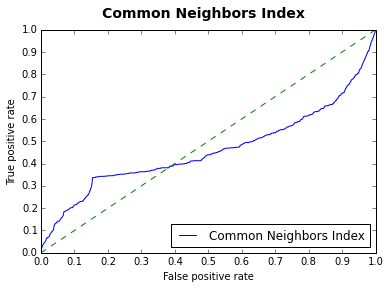

In [61]:
drawROC("Common Neighbors Index", predictions)

In [62]:
roc.getAreaUnderCurve()

0.4596188568749

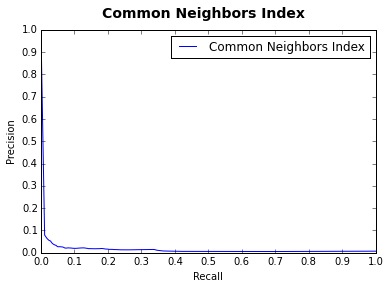

In [63]:
drawPR("Common Neighbors Index", predictions)

In [64]:
pr.getAreaUnderCurve()

0.017166570381792333

In [65]:
startTime = time.time()
predictions = jaccardIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.18555736541748047 seconds


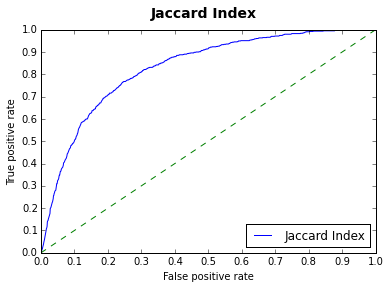

In [66]:
drawROC("Jaccard Index", predictions)

In [67]:
roc.getAreaUnderCurve()

0.8286055787888847

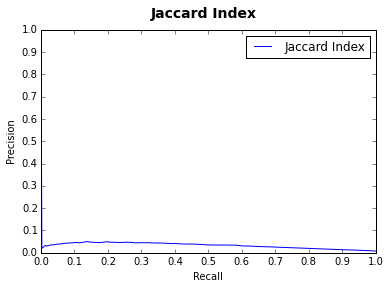

In [68]:
drawPR("Jaccard Index", predictions)

In [69]:
pr.getAreaUnderCurve()

0.03404207530491388

In [70]:
startTime = time.time()
predictions = preferentialAttachmentIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.0404362678527832 seconds


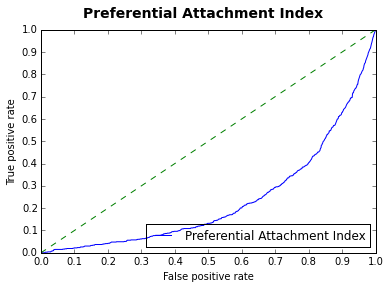

In [71]:
X, Y = roc.getCurve(predictions)
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Preferential Attachment Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [72]:
roc.getAreaUnderCurve()

0.23434354691204787

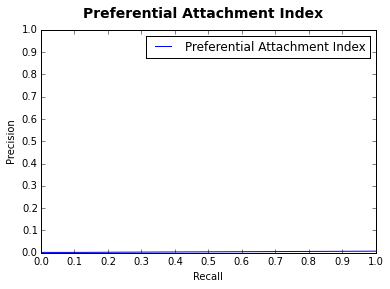

In [73]:
X, Y = pr.getCurve(predictions)
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Preferential Attachment Index")
plt.legend(handles=[curve])

In [74]:
pr.getAreaUnderCurve()

0.0042783268431977

In [75]:
startTime = time.time()
predictions = adamicAdarIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.11868882179260254 seconds


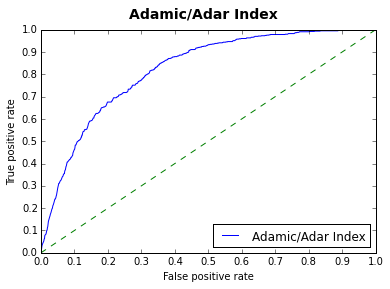

In [76]:
X, Y = roc.getCurve(predictions)
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Adamic/Adar Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [77]:
roc.getAreaUnderCurve()

0.8200490260202736

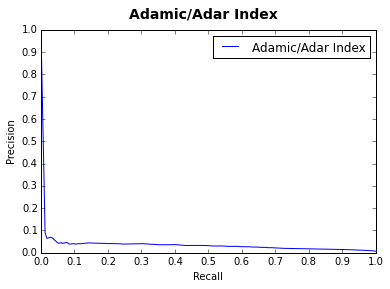

In [78]:
X, Y = pr.getCurve(predictions)
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Adamic/Adar Index")
plt.legend(handles=[curve])

In [79]:
pr.getAreaUnderCurve()

0.03691153568793609

In [80]:
startTime = time.time()
predictions = uDegreeIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.039373159408569336 seconds


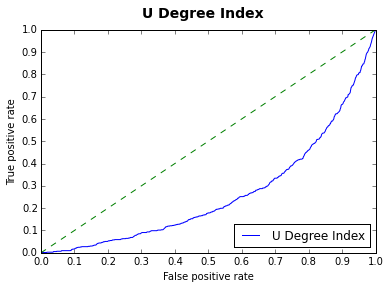

In [81]:
X, Y = roc.getCurve(predictions)
plt.suptitle("U Degree Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="U Degree Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [82]:
roc.getAreaUnderCurve()

0.2619706684376713

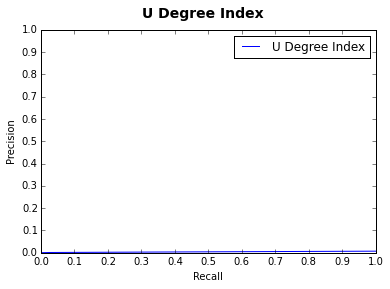

In [83]:
X, Y = pr.getCurve(predictions)
plt.suptitle("U Degree Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="U Degree Index")
plt.legend(handles=[curve])

In [84]:
pr.getAreaUnderCurve()

0.005095612913082492

In [85]:
startTime = time.time()
predictions = vDegreeIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.03945302963256836 seconds


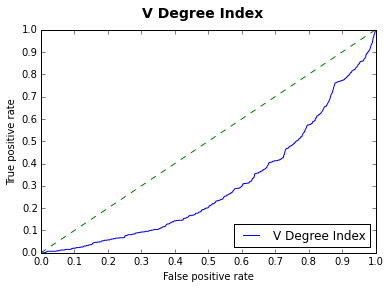

In [86]:
X, Y = roc.getCurve(predictions)
plt.suptitle("V Degree Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="V Degree Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [87]:
roc.getAreaUnderCurve()

0.3019280776471914

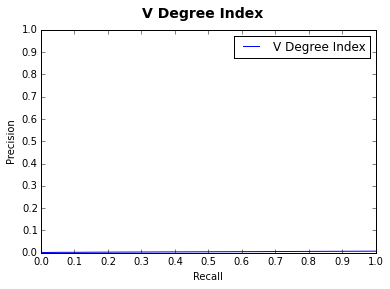

In [88]:
X, Y = pr.getCurve(predictions)
plt.suptitle("V Degree Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="V Degree Index")
plt.legend(handles=[curve])

In [89]:
pr.getAreaUnderCurve()

0.004651934393954905

In [90]:
startTime = time.time()
algebraicDistanceIndex.preprocess()
predictions = algebraicDistanceIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.42450666427612305 seconds


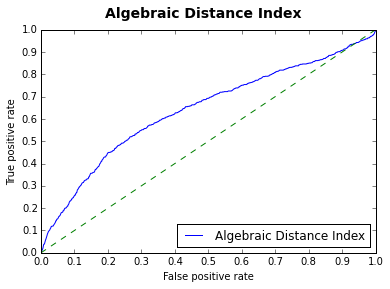

In [91]:
X, Y = roc.getCurve(predictions)
plt.suptitle("Algebraic Distance Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Algebraic Distance Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [92]:
roc.getAreaUnderCurve()

0.6397770041295127

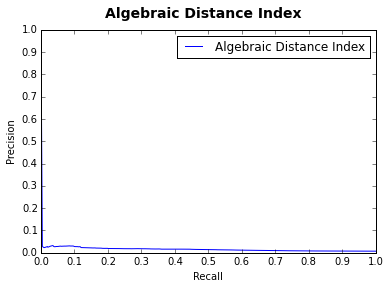

In [93]:
X, Y = pr.getCurve(predictions)
plt.suptitle("Algebraic Distance Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Algebraic Distance Index")
plt.legend(handles=[curve])

In [94]:
pr.getAreaUnderCurve()

0.017100403516651434

In [95]:
startTime = time.time()
predictions = reversedNeighborhoodDistanceIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.11342072486877441 seconds


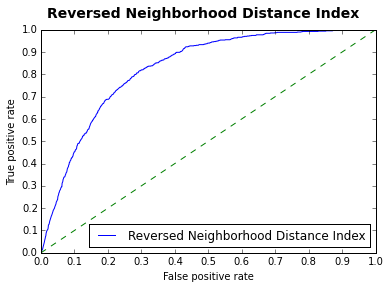

In [96]:
X, Y = roc.getCurve(predictions)
plt.suptitle("Reversed Neighborhood Distance Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Reversed Neighborhood Distance Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [97]:
roc.getAreaUnderCurve()

0.8266649504760722

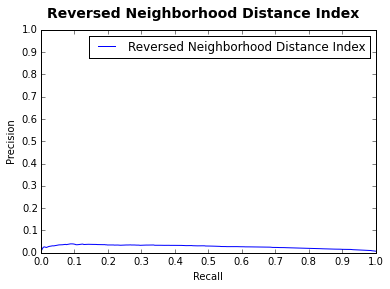

In [98]:
X, Y = pr.getCurve(predictions)
plt.suptitle("Reversed Neighborhood Distance Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Reversed Neighborhood Distance Index")
plt.legend(handles=[curve])

In [99]:
pr.getAreaUnderCurve()

0.028416894935350115

In [100]:
#node = trainingGraph.randomNode()
#nodes = trainingGraph.neighbors(node)
#subGraph = graph.Subgraph().fromNodes(trainingGraph, nodes)

In [101]:
#LIST_LENGTH = len(nodes) - 1
#a = []
#color = {}
#while len(a) < LIST_LENGTH:
#    a.append(500)
#for e in nodes:
#    color[e] = len(nodes)
#a.append(2000)
#len(color)
#color[list(color)[-1]] = len(nodes) / 2
#color[list(color)[-2]] = len(nodes) / 3

In [102]:
#viztasks.drawGraph(subGraph, (7,7), False, a, None, color)

In [ ]:
startTime = time.time()
predictions = katzIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

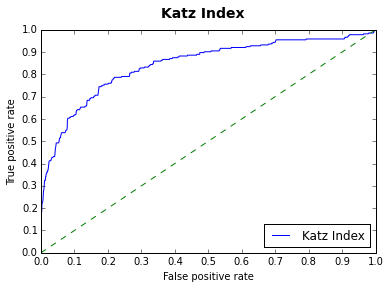

In [89]:
X, Y = roc.getCurve(predictions)
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Katz Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [90]:
roc.getAreaUnderCurve()

0.8426332056050079

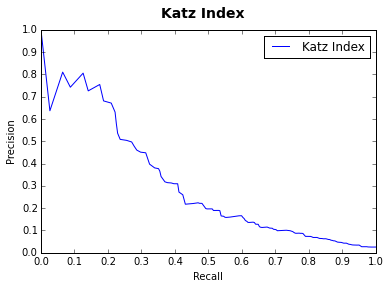

In [91]:
X, Y = pr.getCurve(predictions)
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Katz Index")
plt.legend(handles=[curve])

In [92]:
pr.getAreaUnderCurve()

0.31293375484133285

In [93]:
startTime = time.time()
predictions = totalNeighborsIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.01715874671936035 seconds


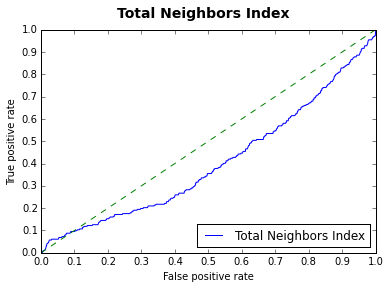

In [94]:
X, Y = roc.getCurve(predictions)
plt.suptitle("Total Neighbors Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Total Neighbors Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [95]:
roc.getAreaUnderCurve()

0.4038364434136275

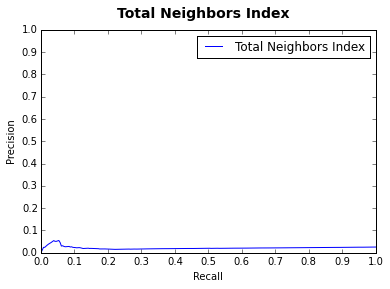

In [96]:
X, Y = pr.getCurve(predictions)
plt.suptitle("Total Neighbors Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Total Neighbors Index")
plt.legend(handles=[curve])

In [97]:
pr.getAreaUnderCurve()

0.022209204564920794

In [98]:
startTime = time.time()
predictions = neighborsMeasureIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.08110761642456055 seconds


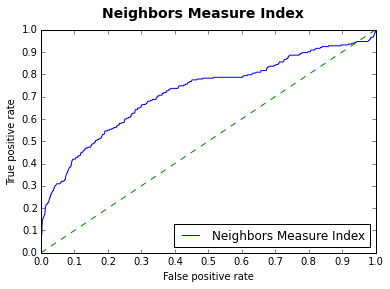

In [99]:
X, Y = roc.getCurve(predictions)
plt.suptitle("Neighbors Measure Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Neighbors Measure Index")
plt.plot([0, 1], [0, 1], ls='--')
plt.legend(handles=[curve], loc=4)

In [100]:
roc.getAreaUnderCurve()

0.7178137765915146

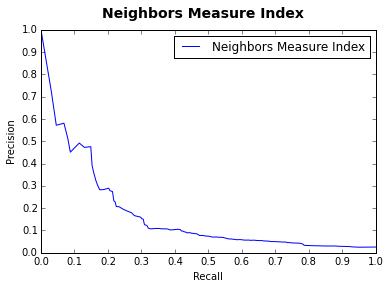

In [101]:
X, Y = pr.getCurve(predictions)
plt.suptitle("Neighbors Measure Index", fontsize=14, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
curve, = plt.plot(X, Y, label="Neighbors Measure Index")
plt.legend(handles=[curve])

In [102]:
pr.getAreaUnderCurve()

0.16693383764984882

In [103]:
startTime = time.time()
predictions = adjustedRandIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.09865903854370117 seconds


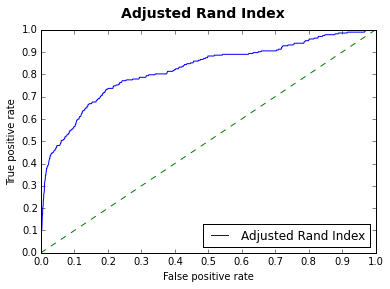

In [104]:
drawROC("Adjusted Rand Index", predictions)

In [105]:
roc.getAreaUnderCurve()

0.8206319193142008

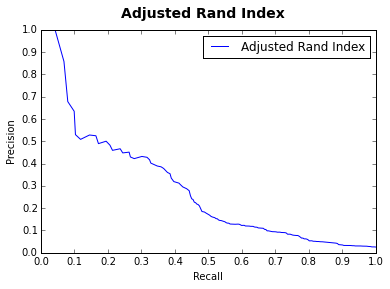

In [106]:
drawPR("Adjusted Rand Index", predictions)

In [107]:
pr.getAreaUnderCurve()

0.28916295920532237

In [108]:
startTime = time.time()
predictions = resourceAllocationIndex.runOnParallel(nodePairsTest)
print("%s seconds" % (time.time() - startTime))

0.011899948120117188 seconds


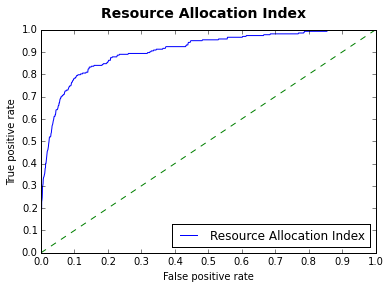

In [109]:
drawROC("Resource Allocation Index", predictions)

In [110]:
roc.getAreaUnderCurve()

0.9069573972144769

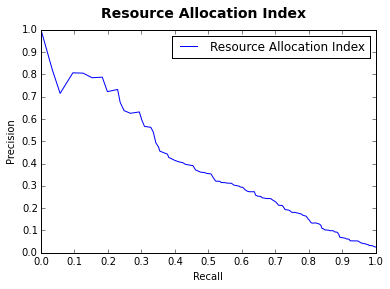

In [111]:
drawPR("Resource Allocation Index", predictions)

In [112]:
pr.getAreaUnderCurve()

0.4065253563599124

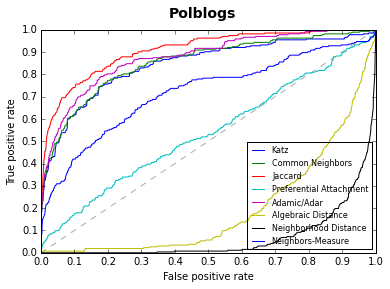

In [113]:
p1 = katzIndex.runOnParallel(nodePairsTest)
p2 = commonNeighborsIndex.runOnParallel(nodePairsTest)
p3 = jaccardIndex.runOnParallel(nodePairsTest)
p4 = preferentialAttachmentIndex.runOnParallel(nodePairsTest)
p5 = adamicAdarIndex.runOnParallel(nodePairsTest)
p6 = algebraicDistanceIndex.runOnParallel(nodePairsTest)
p7 = neighborhoodDistanceIndex.runOnParallel(nodePairsTest)
p8 = neighborsMeasureIndex.runOnParallel(nodePairsTest)
ins=["Katz", "Common Neighbors", "Jaccard", "Preferential Attachment", "Adamic/Adar", "Algebraic Distance", "Neighborhood Distance", "Neighbors-Measure"]
preds=[p1, p2, p3, p4, p5, p6, p7, p8]
drawROCs("Polblogs", indexNames=ins, predictions=preds)